In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"sents.txt", sep=".",header=None)
df = df.rename(columns={0 : 'Feedback'})
df.drop(1, axis=1, inplace=True)
df_sentiment = pd.read_csv(r"sentiments.txt",header=None)
df_topic = pd.read_csv(r"topics.txt",header=None)

In [2]:
sentiments_dict = {
    0:"negative",
    1:"neutral",
    2:"positive",
}
def update_sentiments(col):
    for i in range(len(col)):
        col[i] = sentiments_dict[col[i]]
    return col
update_sentiments(df_sentiment[0])

0        negative
1        negative
2        positive
3        negative
4        negative
           ...   
16170    negative
16171    positive
16172    negative
16173    positive
16174    positive
Name: 0, Length: 16175, dtype: object

In [3]:
topic_dict = {
    0:"Lecture",
    1:"Curriculum",
    2:"Facility",
    3:"Others",
}
def update_topic(col):
    for i in range(len(col)):
        col[i] = topic_dict[col[i]]
    return col

update_topic(df_topic[0])

0        Curriculum
1           Lecture
2           Lecture
3           Lecture
4           Lecture
            ...    
16170    Curriculum
16171       Lecture
16172       Lecture
16173       Lecture
16174       Lecture
Name: 0, Length: 16175, dtype: object

In [4]:
df['Sentiment'] = df_sentiment
df['Topic']=df_topic
df

,Feedback,Sentiment,Topic
0,giáo trình chưa cụ thể,negative,Curriculum
1,giảng buồn ngủ,negative,Lecture
2,"giáo viên vui tính , tận tâm",positive,Lecture
3,"giảng viên nên giao bài tập nhiều hơn , chia n...",negative,Lecture
4,"giảng viên cần giảng bài chi tiết hơn , đi sâu...",negative,Lecture
...,...,...,...
16170,chỉ vì môn game mà em học hai lần mà không qua...,negative,Curriculum
16171,em cảm ơn cô nhiều,positive,Lecture
16172,giao bài tập quá nhiều,negative,Lecture
16173,"giáo viên dạy dễ hiểu , nhiệt tình",positive,Lecture


In [5]:
df.shape

(16175, 3)

In [6]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2c1c072e550>,
 [Text(0.13818449830760954, 1.091285959053572, 'Negative'),
  Text(-1.0925640300856791, 0.12768649170111718, 'Neutral'),
  Text(0.010575384228815337, -1.099949163029098, 'Positive')],
 [Text(0.07537336271324155, 0.5952468867564937, '45.99%'),
  Text(-0.5959440164103704, 0.06964717729151845, '4.32%'),
  Text(0.0057683913975356375, -0.5999722707431443, '49.69%')])

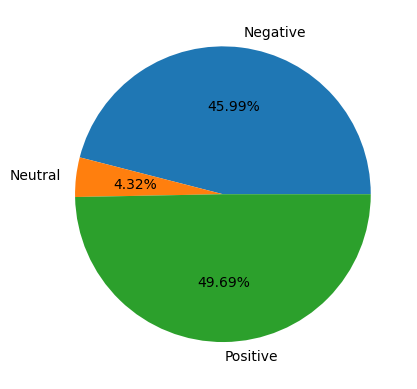

In [7]:
sentiments_plt = [df['Sentiment'].value_counts()['negative'], df['Sentiment'].value_counts()['neutral'], df['Sentiment'].value_counts()['positive']]
labels = ["Negative", "Neutral", "Positive"]

fig, ax = plt.subplots()
ax.pie(sentiments_plt, labels=labels, autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x2c1bf6a7310>,
 [Text(-0.6947261372464173, 0.8528514490968943, 'Lecture'),
  Text(0.4149487129203974, -1.0187333142906958, 'Curriculum'),
  Text(0.9879594297407164, -0.48366947927939247, 'Facility'),
  Text(1.0862137517367765, -0.17360784987412428, 'Others')],
 [Text(-0.3789415294071367, 0.4651916995073968, '71.76%'),
  Text(0.226335661592944, -0.5556727168858341, '18.79%'),
  Text(0.5388869616767543, -0.2638197159705777, '4.40%'),
  Text(0.5924802282200599, -0.09469519084043142, '5.04%')])

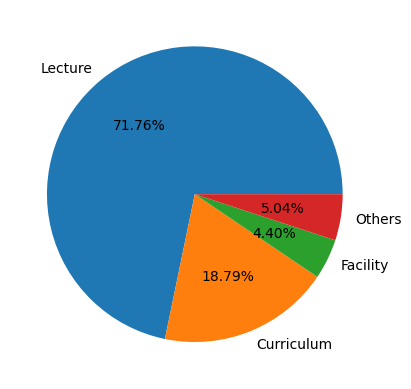

In [8]:
topic_plt= [df['Topic'].value_counts()['Lecture'], df['Topic'].value_counts()['Curriculum'], df['Topic'].value_counts()['Facility'], df['Topic'].value_counts()['Others']]
labels=['Lecture','Curriculum','Facility','Others']
fig, ax = plt.subplots()
ax.pie(topic_plt, labels=labels, autopct='%1.2f%%')